In [266]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [267]:
fp = "../../Datasets/World Happiness/2019.csv"

In [268]:
df = pd.read_csv(fp)
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# Soal 2 Poin 1

In [269]:
withouOverall = df.drop(['Overall rank'], axis=1)
desc = withouOverall.describe()

- ## Adding Mode

In [270]:
mode = withouOverall[list(desc.columns)].mode().loc[0]
desc = desc.append(pd.Series(mode, name='mode'))

- ## Adding Variance

In [271]:
var = desc.loc['std'] ** 2
desc = desc.append(pd.Series(var, name='var'))

- ## Adding Range

In [272]:
rangeStat = desc.loc['max'] - desc.loc['min']
desc = desc.append(pd.Series(rangeStat, name='range'))

- ## Adding IQR, Lowerbound and Upperbound

In [273]:
iqr = desc.loc['75%'] - desc.loc['25%']
low = desc.loc['25%'] - (1.5 * iqr)
upp = desc.loc['75%'] + (1.5 * iqr)
desc = desc.append(pd.Series(iqr, name='iqr'))
desc = desc.append(pd.Series(low, name='lowerbound'))
desc = desc.append(pd.Series(upp, name='upperbound'))

In [274]:
desc

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000
mode,5.208000,0.960000,1.465000,0.815000,0.498000,0.153000,0.028000
var,1.239036,0.158714,0.089515,0.058624,0.020532,0.009073,0.008937


- ## Z-Score of Every Data Point

In [275]:
zscore = (withouOverall['Score'] - desc['Score'].loc['mean'])/desc['Score'].loc['std']
zgdp = (withouOverall['GDP per capita'] - desc['GDP per capita'].loc['mean'])/desc['GDP per capita'].loc['std']
zsocial = (withouOverall['Social support'] - desc['Social support'].loc['mean'])/desc['Social support'].loc['std']
zhealth = (withouOverall['Healthy life expectancy'] - desc['Healthy life expectancy'].loc['mean'])/desc['Healthy life expectancy'].loc['std']
zfreedom = (withouOverall['Freedom to make life choices'] - desc['Freedom to make life choices'].loc['mean'])/desc['Freedom to make life choices'].loc['std']
zgenerosity = (withouOverall['Generosity'] - desc['Generosity'].loc['mean'])/desc['Generosity'].loc['std']
zperceptions = (withouOverall['Perceptions of corruption'] - desc['Perceptions of corruption'].loc['mean'])/desc['Perceptions of corruption'].loc['std']

zScoreAll = pd.DataFrame([zscore,zgdp,zsocial,zhealth,zfreedom,zgenerosity,zperceptions]).T
zScoreAll

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2.121877,1.091526,1.264027,1.076954,1.419710,-0.334327,2.987137
1,1.970052,1.199461,1.217234,1.118255,1.391794,0.704994,3.166959
2,1.928727,1.463022,1.247315,1.250419,1.468562,0.904460,2.437092
3,1.874824,1.191931,1.387693,1.242159,1.384816,1.775811,0.078248
4,1.869434,1.232092,1.046774,1.130646,1.147534,1.439868,1.982248
...,...,...,...,...,...,...,...
151,-1.862420,-1.370888,-1.663865,-0.459449,1.133576,0.337557,3.177537
152,-1.954952,-1.077206,-1.082297,-0.934412,0.170490,0.956951,0.385004
153,-1.980107,-1.393479,-2.312279,-1.504368,-2.739702,-0.281836,-0.905485
154,-2.087912,-2.206754,-4.040270,-2.561677,-1.169454,0.526525,-0.799707


# Soal 2 Poin 2

- ## Outlier IQR Method

In [276]:
#Outlier for Score

In [277]:
df[df['Score'] < desc['Score'].loc['lowerbound']]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [278]:
df[df['Score'] > desc['Score'].loc['upperbound']]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [279]:
#Outlier for GDP

In [280]:
df[df['GDP per capita'] < desc['GDP per capita'].loc['lowerbound']]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [281]:
df[df['GDP per capita'] > desc['GDP per capita'].loc['upperbound']]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [282]:
#Outlier for Social

In [283]:
df[df['Social support'] < desc['Social support'].loc['lowerbound']]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
101,102,Benin,4.883,0.393,0.437,0.397,0.349,0.175,0.082
144,145,Burundi,3.775,0.046,0.447,0.380,0.220,0.176,0.180
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [284]:
df[df['Social support'] > desc['Social support'].loc['upperbound']]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [285]:
#Outlier for Health

In [286]:
df[df['Healthy life expectancy'] < desc['Healthy life expectancy'].loc['lowerbound']]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
134,135,Swaziland,4.212,0.811,1.149,0.0,0.313,0.074,0.135


In [287]:
df[df['Healthy life expectancy'] > desc['Healthy life expectancy'].loc['upperbound']]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [288]:
#Outlier for Freedom

In [289]:
df[df['Freedom to make life choices'] < desc['Freedom to make life choices'].loc['lowerbound']]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
153,154,Afghanistan,3.203,0.35,0.517,0.361,0.0,0.158,0.025


In [290]:
df[df['Freedom to make life choices'] > desc['Freedom to make life choices'].loc['upperbound']]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [291]:
#Outlier for Generosity

In [292]:
df[df['Generosity'] < desc['Generosity'].loc['lowerbound']]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [293]:
df[df['Generosity'] > desc['Generosity'].loc['upperbound']]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
91,92,Indonesia,5.192,0.931,1.203,0.660,0.491,0.498,0.028
130,131,Myanmar,4.360,0.710,1.181,0.555,0.525,0.566,0.172


In [294]:
#Outlier for Perceptions

In [295]:
df[df['Perceptions of corruption'] < desc['Perceptions of corruption'].loc['lowerbound']]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [296]:
df[df['Perceptions of corruption'] > desc['Perceptions of corruption'].loc['upperbound']]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
10,11,Australia,7.228,1.372,1.548,1.036,0.557,0.332,0.290
13,14,Luxembourg,7.090,1.609,1.479,1.012,0.526,0.194,0.316


- ## Outlier Z Score Method

In [297]:
#Outlier for Score

In [298]:
zScoreAll[(zScoreAll['Score'] > 2.5) | (zScoreAll['Score'] < -2.5)]

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [299]:
#Outlier for GDP

In [300]:
zScoreAll[(zScoreAll['GDP per capita'] > 2.5) | (zScoreAll['GDP per capita'] < -2.5)]

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [301]:
#Outlier for Social

In [302]:
zScoreAll[(zScoreAll['Social support'] > 2.5) | (zScoreAll['Social support'] < -2.5)]

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
101,-0.470835,-1.285545,-2.579667,-1.355684,-0.304073,-0.103367,-0.302552
144,-1.466236,-2.156552,-2.546243,-1.425896,-1.204349,-0.092869,0.734070
148,-1.747427,-0.718261,-2.776865,-1.178089,-2.648977,1.534352,0.321537
154,-2.087912,-2.206754,-4.040270,-2.561677,-1.169454,0.526525,-0.799707


In [303]:
#Outlier for Healthy

In [304]:
zScoreAll[(zScoreAll['Healthy life expectancy'] > 2.5) | (zScoreAll['Healthy life expectancy'] < -2.5)]

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
134,-1.073646,-0.236320,-0.199919,-2.995340,-0.555313,-1.163685,0.258071
154,-2.087912,-2.206754,-4.040270,-2.561677,-1.169454,0.526525,-0.799707


In [305]:
#Outlier for Freedom

In [306]:
zScoreAll[(zScoreAll['Freedom to make life choices'] > 2.5) | (zScoreAll['Freedom to make life choices'] < -2.5)]

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
146,-1.626147,-1.461252,-1.740739,-1.140918,-2.558252,2.458193,-0.006374
148,-1.747427,-0.718261,-2.776865,-1.178089,-2.648977,1.534352,0.321537
153,-1.980107,-1.393479,-2.312279,-1.504368,-2.739702,-0.281836,-0.905485
155,-2.294538,-1.503924,-2.118424,-1.776956,-2.669914,0.180084,-0.207352


In [307]:
#Outlier for Generosity

In [308]:
zScoreAll[(zScoreAll['Generosity'] > 2.5) | (zScoreAll['Generosity'] < -2.5)]

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
91,-0.193237,0.064893,-0.019433,-0.269464,0.686928,3.287551,-0.873751
130,-0.940686,-0.489841,-0.092964,-0.703126,0.924209,4.001429,0.649448


In [309]:
#Outlier for Perceptions

In [310]:
zScoreAll[(zScoreAll['Perceptions of corruption'] > 2.5) | (zScoreAll['Perceptions of corruption'] < -2.5)]

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2.121877,1.091526,1.264027,1.076954,1.419710,-0.334327,2.987137
1,1.970052,1.199461,1.217234,1.118255,1.391794,0.704994,3.166959
6,1.739169,1.209501,0.929792,1.171947,1.266175,0.862467,2.775581
7,1.706828,0.998652,1.163756,1.242159,1.342942,1.523854,2.849626
33,0.768025,1.673871,0.849576,1.717122,1.140555,0.904460,3.621803
151,-1.862420,-1.370888,-1.663865,-0.459449,1.133576,0.337557,3.177537


# Soal 2 Poin 3

- ## Boxplot

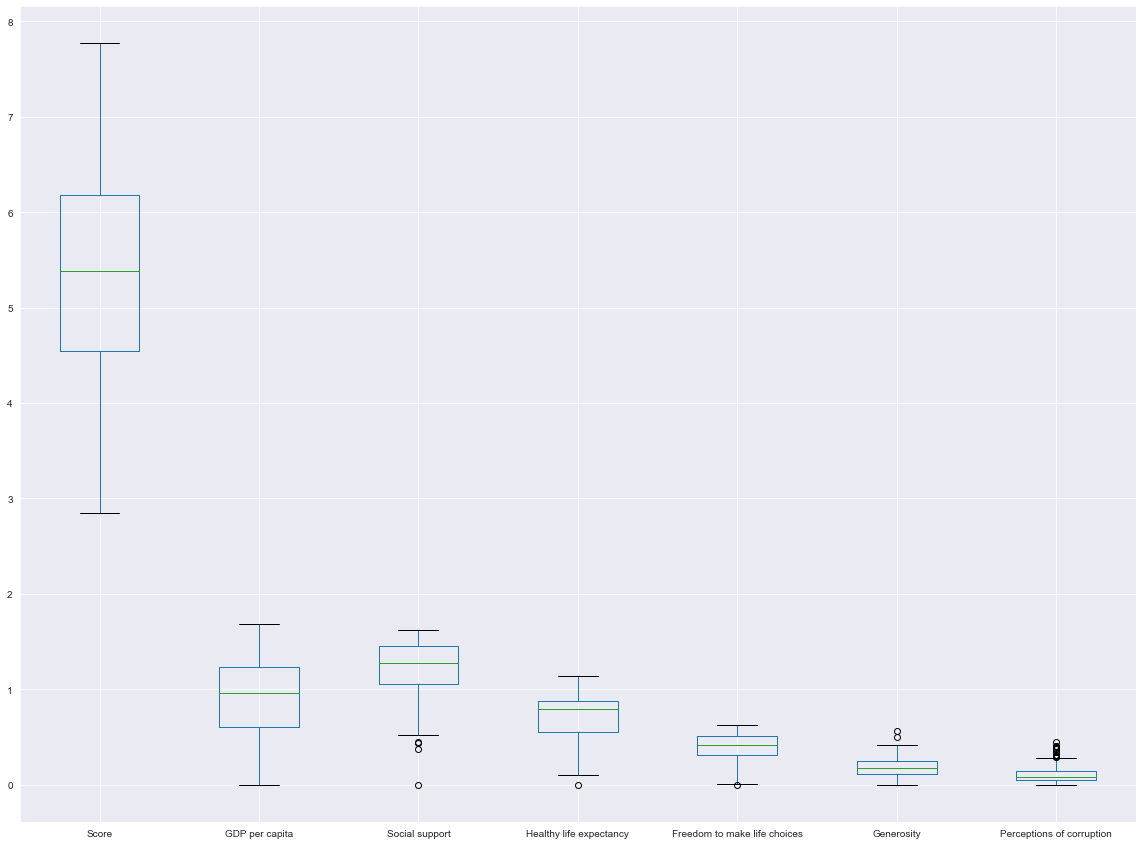

In [311]:
plt.figure(figsize=(20,15))
withouOverall.boxplot(column=list(withouOverall.columns[1::]))
plt.show()

- ## Histogram

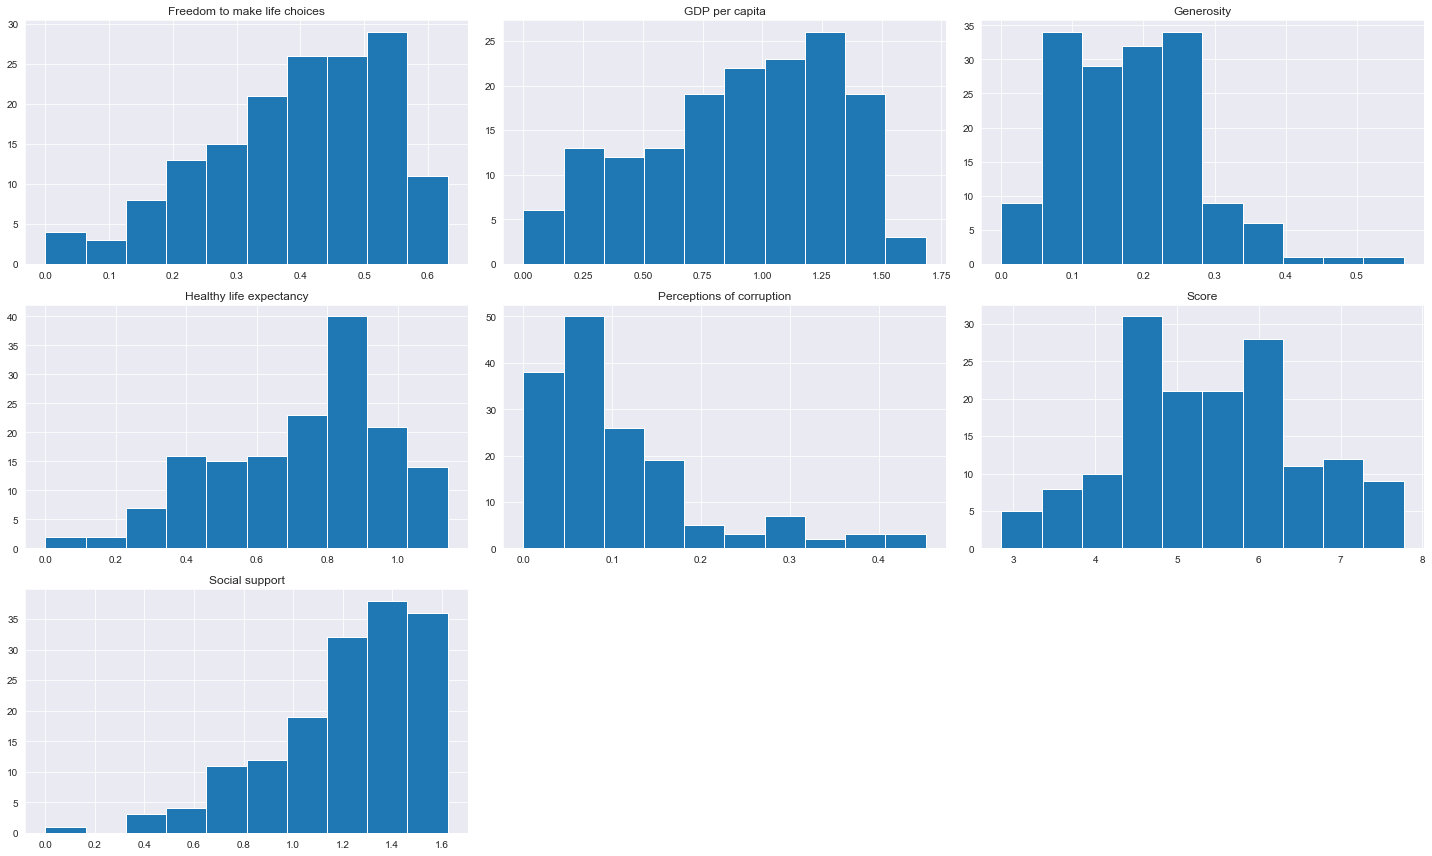

In [312]:
withouOverall.hist(figsize=(20,12))
plt.tight_layout()

# Soal 2 Poin 4

- ## Covariance

In [313]:
df.cov()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,2041.000000,-49.739565,-14.433603,-10.373597,-8.613123,-3.538429,-0.206529,-1.503206
Score,-49.739565,1.239036,0.352052,0.258788,0.210189,0.090394,0.008040,0.040579
GDP per capita,-14.433603,0.352052,0.158714,0.089981,0.080588,0.021640,-0.003023,0.011258
Social support,-10.373597,0.258788,0.089981,0.089515,0.052086,0.019178,-0.001372,0.005145
Healthy life expectancy,-8.613123,0.210189,0.080588,0.052086,0.058624,0.013544,-0.000681,0.006759
Freedom to make life choices,-3.538429,0.090394,0.021640,0.019178,0.013544,0.020532,0.003682,0.005945
Generosity,-0.206529,0.008040,-0.003023,-0.001372,-0.000681,0.003682,0.009073,0.002941
Perceptions of corruption,-1.503206,0.040579,0.011258,0.005145,0.006759,0.005945,0.002941,0.008937


- ## Correlation

In [314]:
#Pearson Method
df.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


In [315]:
#Spearman Method
df.corr(method='spearman')

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.999999,-0.814430,-0.816125,-0.807279,-0.552014,-0.070484,-0.217240
Score,-0.999999,1.000000,0.814483,0.816181,0.807275,0.551974,0.070483,0.217348
GDP per capita,-0.814430,0.814483,1.000000,0.768539,0.851513,0.393426,-0.041304,0.223203
Social support,-0.816125,0.816181,0.768539,1.000000,0.725997,0.449491,0.007695,0.114017
Healthy life expectancy,-0.807279,0.807275,0.851513,0.725997,1.000000,0.412906,-0.006773,0.165309
Freedom to make life choices,-0.552014,0.551974,0.393426,0.449491,0.412906,1.000000,0.324146,0.403586
Generosity,-0.070484,0.070483,-0.041304,0.007695,-0.006773,0.324146,1.000000,0.286171
Perceptions of corruption,-0.217240,0.217348,0.223203,0.114017,0.165309,0.403586,0.286171,1.000000


In [316]:
#Kendall Method
df.corr(method='kendall')

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.999959,-0.619885,-0.616683,-0.602671,-0.394270,-0.043840,-0.140885
Score,-0.999959,1.000000,0.619993,0.616792,0.602613,0.394203,0.043759,0.140974
GDP per capita,-0.619885,0.619993,1.000000,0.569193,0.655693,0.270837,-0.042451,0.135225
Social support,-0.616683,0.616792,0.569193,1.000000,0.529983,0.319566,0.000746,0.070270
Healthy life expectancy,-0.602671,0.602613,0.655693,0.529983,1.000000,0.288418,-0.004901,0.106295
Freedom to make life choices,-0.394270,0.394203,0.270837,0.319566,0.288418,1.000000,0.226187,0.277792
Generosity,-0.043840,0.043759,-0.042451,0.000746,-0.004901,0.226187,1.000000,0.188933
Perceptions of corruption,-0.140885,0.140974,0.135225,0.070270,0.106295,0.277792,0.188933,1.000000


# Soal 2 Poin 5

- ## Barchart Visualization

## Top 10 GDP Country

In [317]:
top_gdp = df[['Country or region', 'GDP per capita']].nlargest(10, 'GDP per capita')
top_gdp

,Country or region,GDP per capita
28,Qatar,1.684
13,Luxembourg,1.609
33,Singapore,1.572
20,United Arab Emirates,1.503
50,Kuwait,1.500
15,Ireland,1.499
2,Norway,1.488
5,Switzerland,1.452
75,Hong Kong,1.438
18,United States,1.433


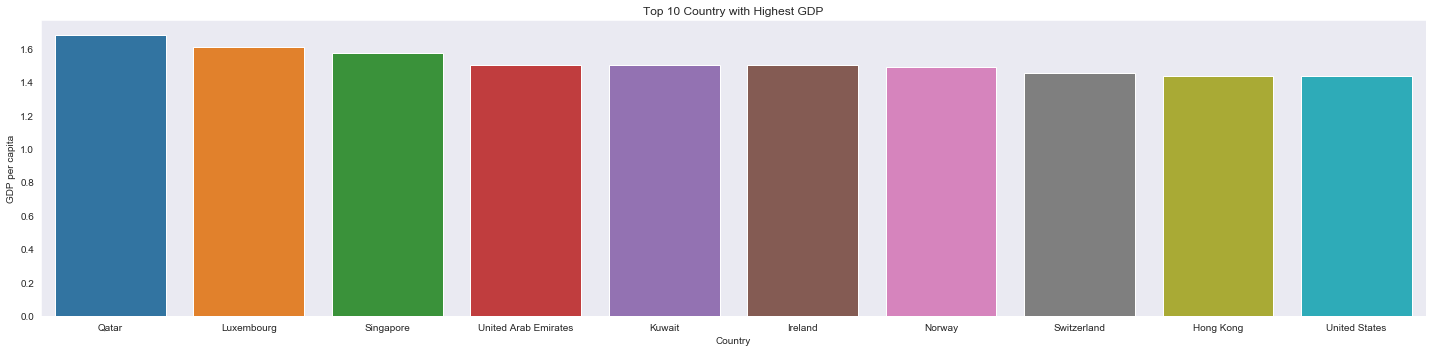

In [318]:
plt.figure(figsize=(20,5))
sns.barplot(top_gdp['Country or region'], top_gdp['GDP per capita'])
plt.title('Top 10 Country with Highest GDP')
plt.xlabel('Country')
plt.ylabel('GDP per capita')
plt.tight_layout()

## Top 10 Health life expectancy country

In [319]:
top_health = df[['Country or region', 'Healthy life expectancy']].nlargest(10, 'Healthy life expectancy')
top_health

,Country or region,Healthy life expectancy
33,Singapore,1.141
75,Hong Kong,1.122
57,Japan,1.088
29,Spain,1.062
5,Switzerland,1.052
23,France,1.045
48,Cyprus,1.042
63,Northern Cyprus,1.042
8,Canada,1.039
35,Italy,1.039


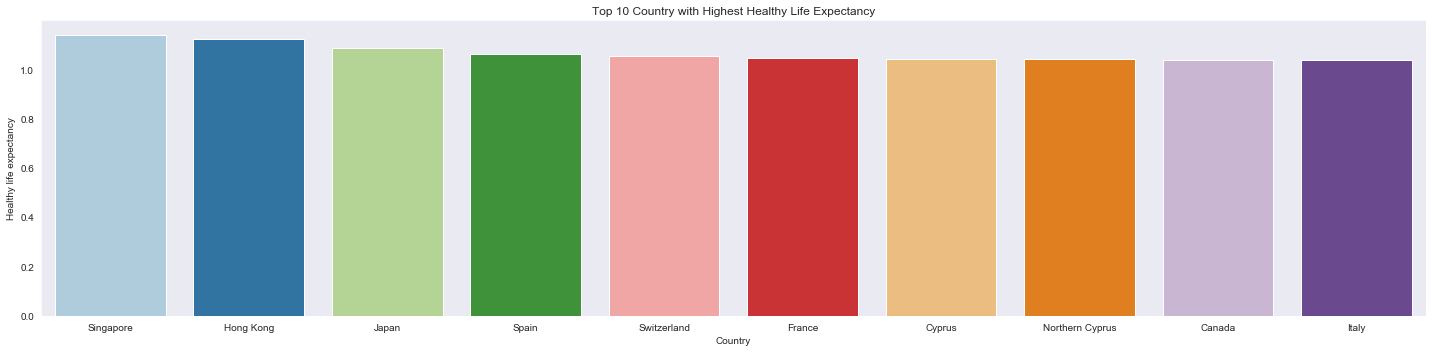

In [320]:
plt.figure(figsize=(20,5))
sns.barplot(top_health['Country or region'], top_health['Healthy life expectancy'],palette='Paired')
plt.title('Top 10 Country with Highest Healthy Life Expectancy')
plt.xlabel('Country')
plt.ylabel('Healthy life expectancy')
plt.tight_layout()

## Top 10 Perceptions of corruption country

In [321]:
top_corrupt = df[['Country or region','Perceptions of corruption']].nlargest(10, 'Perceptions of corruption')
top_corrupt

,Country or region,Perceptions of corruption
33,Singapore,0.453
151,Rwanda,0.411
1,Denmark,0.410
0,Finland,0.393
7,New Zealand,0.380
6,Sweden,0.373
5,Switzerland,0.343
2,Norway,0.341
13,Luxembourg,0.316
15,Ireland,0.310


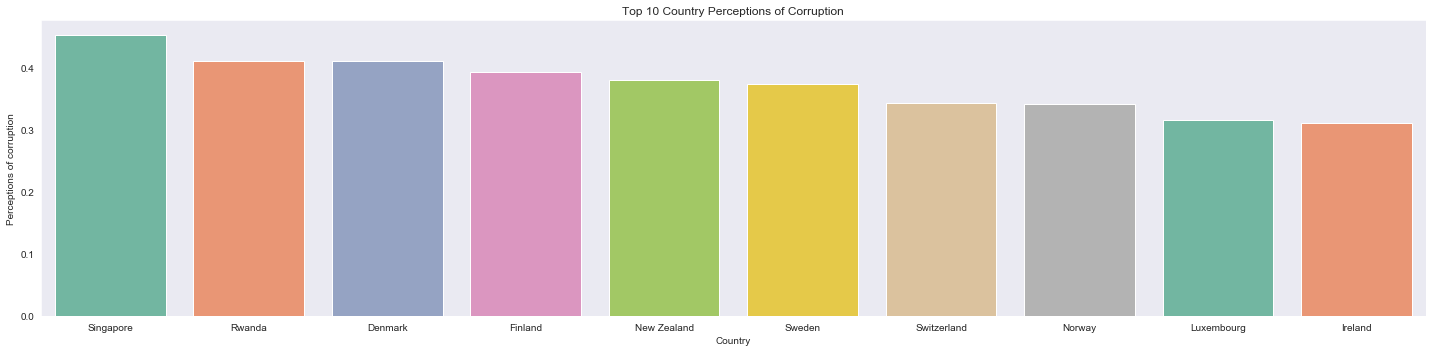

In [322]:
plt.figure(figsize=(20,5))
sns.barplot(top_corrupt['Country or region'], top_corrupt['Perceptions of corruption'],palette='Set2')
plt.title('Top 10 Country Perceptions of Corruption')
plt.xlabel('Country')
plt.ylabel('Perceptions of corruption')
plt.tight_layout()